In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print("Libraries imported successfully!")


Libraries imported successfully!


Dataset Acquisition

Description: 

To perform exploratory data analysis
and Identify factors influencing house prices

Target Variable:
SalePrice - This represents the sale price of the property

Features:
A mix of numerical and categorical data covering physical attributes


Observations:

The data has some inconsistences like missing values, it is generally raw will key insights hidden within it not visable at first glance.

In [2]:
# Loading the dataset
df = pd.read_csv('train.csv')

# Displaying basic structure 
print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 records:")
display(df.head())

Dataset Shape: (1460, 81)

First 5 records:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# This stage involves inspectign the structure of skeleton of the data
# To indentify its technical characteristics

# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numerical Features ({len(numerical_features)}): {numerical_features[:5]}...") # Showing first 5
print(f"Categorical Features ({len(categorical_features)}): {categorical_features[:5]}...")

Numerical Features (38): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']...
Categorical Features (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']...


In [4]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

# Checking for missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print("\nFeatures with missing values:")
print(missing_data)

Number of duplicate records: 0

Features with missing values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


Structure: We examine the shape which is number of rows and columns
as well as he data types like integers, floats, and objects, to ensure the data
loaded correctly

Feature classification Features are separated into numerical values
And Categorical labels like Neigborhood

Then We ensure data integrity by checking for duplicate records and missing values

In [5]:
# Here The goal is to address the issues indentified in the previous cell so that the data is ready for analysis
# To handle missing values we will use Dropping if a column has too many missing values
# Or imputing for filling in the blanks.

# Creates a copy to keep the original data safe
df_cleaned = df.copy()

# Drop columns with excessive missing data
# Based on common Housing Price datasets
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
df_cleaned = df_cleaned.drop(columns=[cols_to_drop], errors='ignore')

# Impute Numerical Missing Values with Median
# We use median because it is less sensitive to outliers than the mean.
for col in df_cleaned.select_dtypes(include=[np.number]).columns:
    if df_cleaned[col].isnull().any():
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Impute Categorical Missing Values with Mode for less frequent values
for col in df_cleaned.select_dtypes(include=['object']).columns:
    if df_cleaned[col].isnull().any():
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

print("Missing values after cleaning:")
print(df_cleaned.isnull().sum().sum())

Missing values after cleaning:
0


In [6]:
# Ensuring data types are consistent
# Convert 'MSSubClass' to string if it's actually a category but seen as a number
if 'MSSubClass' in df_cleaned.columns:
    df_cleaned['MSSubClass'] = df_cleaned['MSSubClass'].astype(str)

print("Consistent Data Types secured.")

Consistent Data Types secured.


In [7]:
# Final check on duplicates and shape just to be sure
df_cleaned = df_cleaned.drop_duplicates()
print(f"Cleaned Dataset Shape: {df_cleaned.shape}")

Cleaned Dataset Shape: (1460, 81)


In [8]:
# Now we use the EDA, shifting from cleaning the data to understaning its patterns and relationships.

# This Generate descriptive statistics for numerical columns
stats = df_cleaned.describe()
display(stats)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


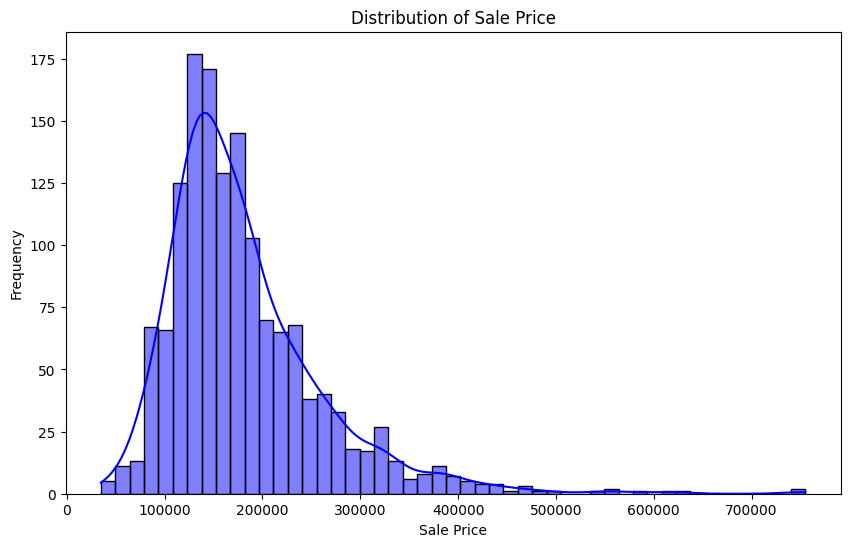

In [9]:
# We need to see how SalePrice is distributed so we set up a visual view of its path

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['SalePrice'], kde=True, color='blue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

From the previous cell we noticed that the graph shows an exponential increase. Then like wise decreases exponentially in just 4 x-vales
We see that as Sale Price appraoches 700000, frequency approaches zero asymptorically.

Now We want to check which features influenced the price.
we create a heatmap of the correlation matrix to identify linear relationship

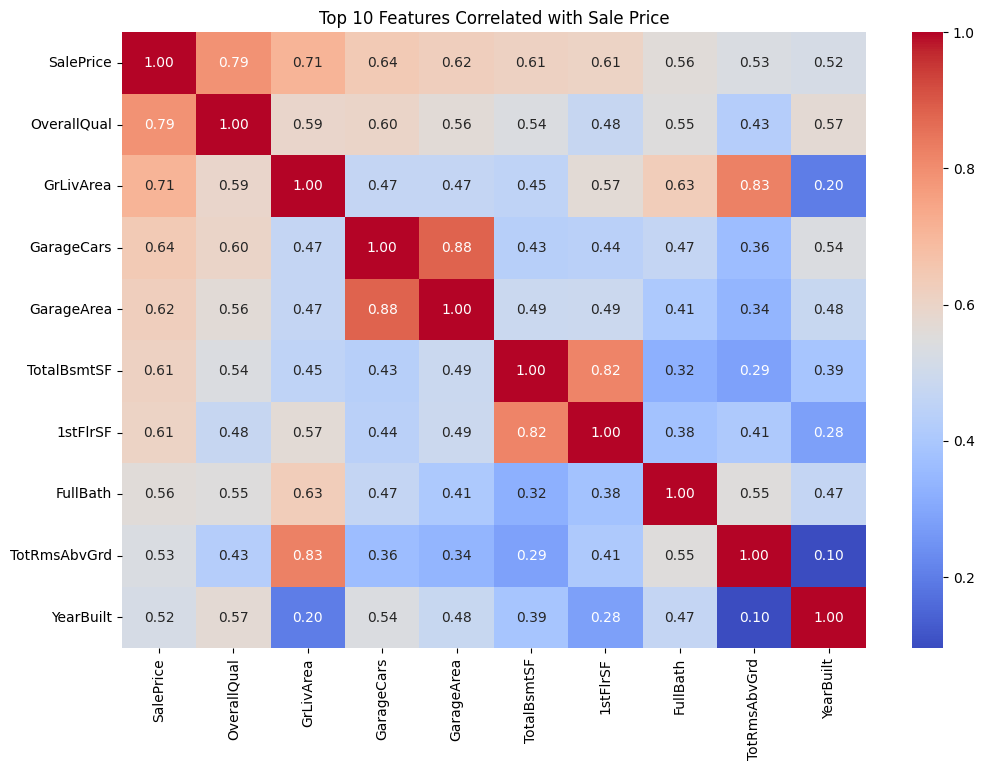

In [10]:
# Select only numerical columns for correlation
numerical_df = df_cleaned.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()

# Plot the heatmap for the top correlations with SalePrice
plt.figure(figsize=(12, 8))
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(10).index
sns.heatmap(df_cleaned[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Features Correlated with Sale Price')
plt.show()

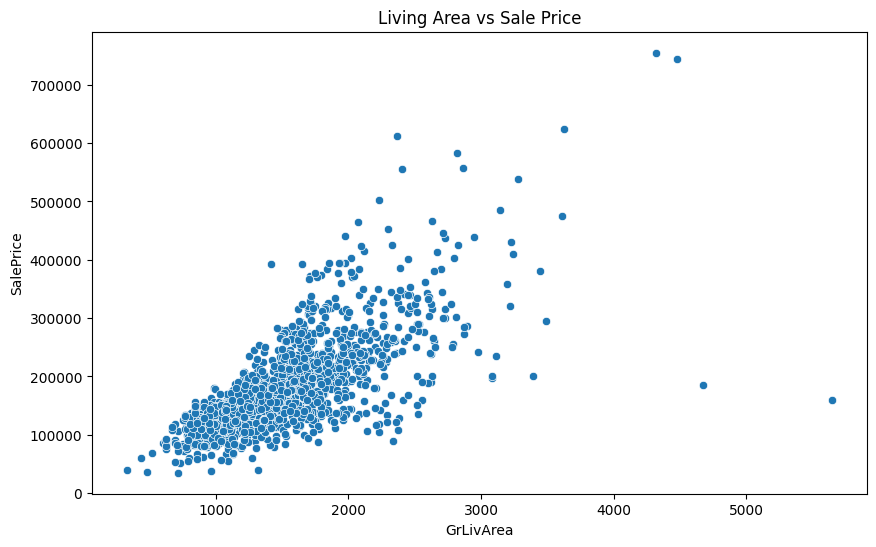

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='GrLivArea', y='SalePrice')
plt.title('Living Area vs Sale Price')
plt.show()

Here we are picking a high correlation feature and plot it against SalePice to see the trend
You will notice that the data is right skewed which means most houses are moderately priced while a few are very expensive
This is also true for frequency vs SalePrice graph where we saw the same concentration around 100000 to 400000

Recommendation: Lets remove the outlier
GrLivArea > 40000 and SalePrice < 300000) to attempt to not cause a bias once the regression line is applied.

In [12]:
# Removing extreme outliers to improve model reliability
# Removing houses with more than 4000 sq ft that have a low SalePrice
df_cleaned = df_cleaned[~((df_cleaned['GrLivArea'] > 40000) & (df_cleaned['SalePrice'] < 300000))]

print(f"New dataset shape after outlier removal: {df_cleaned.shape}")

New dataset shape after outlier removal: (1460, 81)


Summarizing Findings Based On The EDA

1. Data Distribution:

   The target variable SalePrice is right-skewed indicating that the majority of
   homes are in the lowe to middle price ranges, with very fewer luxury one.
   Features such as OverallQual and GRLivArea show the strongest positive
   correalation with price

   Observation: Most houses are clustered between 100000 and 250000

   Insights: There is a long tail of expensive luxury homes reaching up to $700000



2. Correlation Heatmap Analysis

   Top predictors (Based on heatmap): OverallQual(0.79) and GRLivArea(0.71) are the
   strongest drivers of price.

   GarageCars(0.64), GarageArea (0.62), and TotalBsmtSF
   (0.61) also show high positive correlations


   Insights:

   GarageCars and GarageArea are highly correlated with each other (0.88) so
   including both in the model would be redundent


3. Living Area vs Sale Price (Scatter Plot)

   There is a clear linear upward trend where by as square footage increases, the        price generally increases as well.

   Outliers: We notice the two points i the bottom right, houses with > 4000 sq ft                 living area

   Recommendations: I propose an investigation of these outliers or perhaps removing                      them before modelling beacuse they can significantly bias a                           regression line 

   
   


Summary of progressed:

1. Primary Influencers: Physical size such as GrLivArea and material quality such as                          OverallQual are the most critical factors in determining                              house value.

2. Infrastructure: The capacity of the garage and the size of the basement provide                       secondary but significant value.

3. Modeling Strategy: Due to the skewness of prices and the presence of outliers in                         living area, the data requires specific preprocessing by                              removing the outlier as discussed above


Task 1 through 6 are complete.



Through this analysis, we have successfully identified the primary drivers of housing value and prepared a clean, outlier-robust dataset ready for high performance predictive modeling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Select relevant features (based on your high correlation findings)
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = df_cleaned[features]
y = df_cleaned['SalePrice']

# 2. Split data into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1168
Testing set size: 292


In [14]:
# 3. Initialize and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = model.predict(X_test)

# 5. Calculate Performance Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

R-squared Score: 0.7944
Root Mean Squared Error (RMSE): $39,710.99


Model Performance Analysis$R^2$ Score (0.7944): This confirms that your high-correlation features (like OverallQual and GrLivArea) are indeed strong predictors of value.RMSE ($39,710.99): This indicates that, on average, your model's predictions deviate from the actual sale price by about $39,711.Data Split: You correctly split the data into 1168 training samples and 292 testing samples, ensuring the model's performance was evaluated on "unseen" data

Interpretation Note: While the model is generally accurate ($R^2 \approx 0.79$), the RMSE of ~$40k is likely influenced by the "asymptotic" behavior noted earlier. As the frequency of houses approaches zero at higher price points, the model has fewer examples to learn from, making it less accurate for luxury homes.